# Growing Degree-day
## Project for course CMSC-6950

### Group - 3

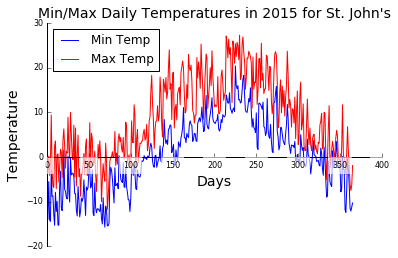

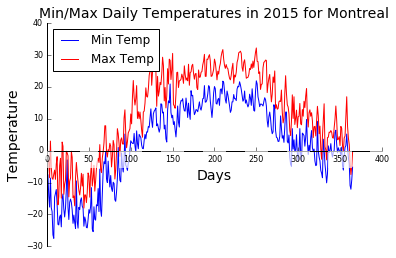

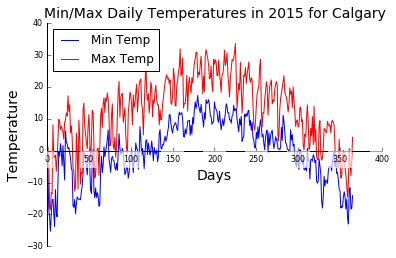

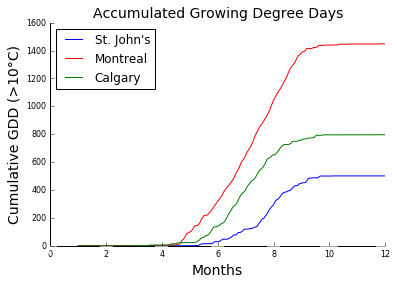

In [2]:
%matplotlib inline
import wget
import numpy as np
import pandas as pd
import time as time
import math
import matplotlib.pyplot as plt

def checkGDD(values):
    gdd = []
    item = 0
    for i in values:
        if i >= 0:
            item += i
        gdd.append(item)
    return gdd

def min_max_plot(A, B, cityName):
    plt.subplot(1,1,1)
    X = np.linspace(1, 365, 365, endpoint=True)
    plt.plot(X, A, color="blue", label = "Min Temp")
    plt.plot(X, B, color="red", label = "Max Temp")
    plt.legend(loc='upper left')
    ax = plt.gca() 
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.spines['bottom'].set_position(('data',0))
    ax.yaxis.set_ticks_position('left')
    ax.spines['left'].set_position(('data',0))

    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_fontsize(8)
        label.set_bbox(dict(facecolor='white', edgecolor='None', alpha=0.65))

    ax.set_xlabel('Days', color='black', fontsize=14)
    ax.set_ylabel('Temperature', color='black', fontsize=14)
    plt.title('Min/Max Daily Temperatures in 2015 for '+cityName, color="black", fontsize=14)

    plt.show()
    

def gdd_plot(gdd1, gdd2, gdd3, cityName1, cityName2, cityName3):
    plt.subplot(1,1,1)
    X = np.linspace(1, 12, 365, endpoint=True)
    plt.plot(X, gdd1, color="blue", label = cityName1)
    plt.plot(X, gdd2, color="red", label = cityName2)
    plt.plot(X, gdd3, color="green", label = cityName3)
    plt.legend(loc='upper left')
    ax = plt.gca() 
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.spines['bottom'].set_position(('data',0))
    ax.yaxis.set_ticks_position('left')
    ax.spines['left'].set_position(('data',0))

    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_fontsize(8)
        label.set_bbox(dict(facecolor='white', edgecolor='None', alpha=0.65))

    ax.set_xlabel('Months', color='black', fontsize=14)
    ax.set_ylabel('Cumulative GDD (>10°C)', color='black', fontsize=14)
    plt.title('Accumulated Growing Degree Days', color="black", fontsize=14)

    plt.show()

def download_data(stationid, start, end, baseTemp, smonth):
    while (start<=end):
        url = 'http://climate.weather.gc.ca/climate_data/bulk_data_e.html?format=csv&stationID='+str(stationid)+'&Year='+str(start)+'&Month='+str(smonth)+'&Day=31&timeframe=2&submit= Download+Data'
        filename=wget.download(url)
        hourly_data=pd.read_csv(filename,encoding='ISO-8859-1',delimiter=",", skiprows=25)
        df = pd.DataFrame(hourly_data, columns = ['Date/Time', 'Max Temp (°C)', 'Min Temp (°C)'])
        # Drop missing Data eg NAN
        df.replace('', np.nan, inplace=True)
        df2 = df.dropna()
        df2['GDD']  = ((df2['Max Temp (°C)']+df2['Min Temp (°C)'])/2)- baseTemp
        df2['GDD'] = checkGDD(df2['GDD'])        
        A, B = np.array(df2['Min Temp (°C)']), np.array(df2['Max Temp (°C)'])
        start=start+1 
    return df2, A, B

    

start=2015
end=2015
baseTemp=10
smonth=12

stationid=50089
cityName1 = 'St. John\'s'
dataA, A1, B1 = download_data(stationid, start, end, baseTemp, smonth)
stationid=51157
cityName2 = 'Montreal'
dataB, A2, B2 = download_data(stationid, start, end, baseTemp, smonth)
stationid=50430
cityName3 = 'Calgary'
dataC, A3, B3 = download_data(stationid, start, end, baseTemp, smonth)

min_max_plot(A1, B1, cityName1)
min_max_plot(A2, B2, cityName2)
min_max_plot(A3, B3, cityName3)

gdd_plot(dataA['GDD'], dataB['GDD'], dataC['GDD'], cityName1, cityName2, cityName3)